In [1]:
# Data processing
import iris
import numpy as np
import warnings
warnings.filterwarnings('ignore', module='iris')
from iris.experimental import stratify
from pathlib import Path
## Scientific parameters
M_air = 28.97 # molar mass of dry air [g mol-1]
# Coefficients to convert mass mixing ratio to volume mixing ratio
coeff_ch4 = (M_air/16.0425)*1e9
coeff_c2h6 = (M_air/30.0690)*1e12
coeff_c3h8 = (M_air/44.0956)*1e12
coeff_meono2 = (M_air/77.0394)*1e12
coeff_etono2 = (M_air/91.0660)*1e12
coeff_nprono2 = (M_air/105.0926)*1e12
coeff_iprono2 = (M_air/105.0926)*1e12

#### Read data

cubelist
[<iris 'Cube' of mass_fraction_of_acetaldehyde_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_propanal_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_acetone_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_peroxypropionyl_nitrate_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_methyl_nitrate_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_methyl_ethyl_ketone_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of m01s34i152 / (unknown) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of m01s34i362 / (unknown) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of m01s34i363 / (unknown) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of air_temperature / (K) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_carbon_monoxide_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_dinitrogen_pentoxide_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_formaldehyde_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_hydroperoxyl_radical_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_hydroxyl_radical_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_methane_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_nitric_acid_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_nitrogen_monoxide_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_nitrous_acid_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_ozone_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_peroxyacetyl_nitrate_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_peroxynitric_acid_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of mass_fraction_of_toluene_in_air / (kg kg-1) (time: 120; model_level_number: 60; latitude: 73; longitude: 96)>,
<iris 'Cube' of tropopause_altitude / (m) (time: 120; latitude: 73; longitude: 96)>]

In [2]:
# Choose UKCA run
ukca_run_name = 'xojne'
path_to_ukca = Path('../../../../data') / ukca_run_name
fname_ukca_run = f'{ukca_run_name}_chem.pp'
# Read UKCA data
cubelist = iris.load(str(path_to_ukca / fname_ukca_run))
cb_ch4 = iris.load_cube(str(path_to_ukca / fname_ukca_run), 'mass_fraction_of_methane_in_air')*coeff_ch4
cb_c2h6 = iris.load_cube(str(path_to_ukca / fname_ukca_run), 'mass_fraction_of_ethane_in_air')*coeff_c2h6
cb_c3h8 = iris.load_cube(str(path_to_ukca / fname_ukca_run), 'mass_fraction_of_propane_in_air')*coeff_c3h8
cb_meono2 = cubelist.extract_strict('mass_fraction_of_methyl_nitrate_in_air')*coeff_meono2
cb_etono2 = cubelist.extract_strict(iris.AttributeConstraint(STASH='m01s34i096'))*coeff_etono2
cb_nprono2 = cubelist.extract_strict(iris.AttributeConstraint(STASH='m01s34i097'))*coeff_nprono2
# cb_iprono2 = iris.load_cube(str(path_to_ukca / fname_ukca_run), iris.AttributeConstraint(STASH='m01s34i098'))*coeff_iprono2

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Everest 28N 87E
print(cb_ch4.coord('latitude').points[47], cb_ch4.coord('longitude').points[23])
# Ocean 45N 45W (or 315E)
print(cb_ch4.coord('latitude').points[54], cb_ch4.coord('longitude').points[84])

27.5 86.25
45.0 315.0


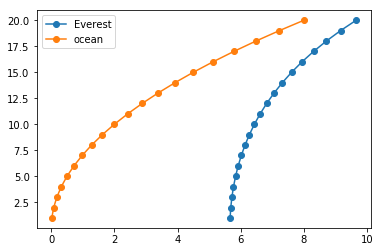

In [43]:
plt.plot(cb_ch4.coord('altitude')[0:20,49,23].points/1000, cb_ch4.coord('model_level_number').points[0:20], marker='o', label='Everest');
plt.plot(cb_ch4.coord('altitude')[0:20,54,84].points/1000, cb_ch4.coord('model_level_number').points[0:20], marker='o', label='ocean');
# plt.plot(cb_ch4.coord('level_height').points/1000, marker='*');
plt.legend();

In [20]:
# Load surface_altitude coordinate
orography = iris.load_cube(str(Path('../../../../data')/'um_orography_xnvtj.nc'))
alt_cb = iris.util.squeeze(orography)
alt_coord = iris.coords.AuxCoord(alt_cb.data, standard_name='surface_altitude', units='m')
# Add surface_altitude coordinate to a cube
cb_ch4.add_aux_coord(alt_coord, data_dims=[2,3])
# cb_c2h6.add_aux_coord(alt_coord, data_dims=[2,3])
# cb_c3h8.add_aux_coord(alt_coord, data_dims=[2,3])
# cb_meono2.add_aux_coord(alt_coord, data_dims=[2,3])
# cb_etono2.add_aux_coord(alt_coord, data_dims=[2,3])
# cb_nprono2.add_aux_coord(alt_coord, data_dims=[2,3])
# cb_iprono2.add_aux_coord(alt_coord, data_dims=[2,3])

# Derive altitude coordinate from surface_altitude
factory_ch4 = iris.aux_factory.HybridHeightFactory(delta=cb_ch4.coord('level_height'), sigma=cb_ch4.coord('sigma'), 
                                                   orography=cb_ch4.coord('surface_altitude'))
# factory_c2h6 = iris.aux_factory.HybridHeightFactory(delta=cb_c2h6.coord('level_height'), orography=cb_c2h6.coord('surface_altitude'))
# factory_c3h8 = iris.aux_factory.HybridHeightFactory(delta=cb_c3h8.coord('level_height'), orography=cb_c3h8.coord('surface_altitude'))
# factory_meono2 = iris.aux_factory.HybridHeightFactory(delta=cb_meono2.coord('level_height'), orography=cb_meono2.coord('surface_altitude'))
# factory_etono2 = iris.aux_factory.HybridHeightFactory(delta=cb_etono2.coord('level_height'), orography=cb_etono2.coord('surface_altitude'))
# factory_nprono2 = iris.aux_factory.HybridHeightFactory(delta=cb_nprono2.coord('level_height'), orography=cb_nprono2.coord('surface_altitude'))
# factory_iprono2 = iris.aux_factory.HybridHeightFactory(delta=cb_iprono2.coord('level_height'), orography=cb_iprono2.coord('surface_altitude'))

cb_ch4.add_aux_factory(factory_ch4)
# cb_c2h6.add_aux_factory(factory_c2h6)
# cb_c3h8.add_aux_factory(factory_c3h8)
# cb_meono2.add_aux_factory(factory_meono2)
# cb_etono2.add_aux_factory(factory_etono2)
# cb_nprono2.add_aux_factory(factory_nprono2)
# cb_iprono2.add_aux_factory(factory_iprono2)

#### Relevel model data from level height to tagret levels

In [ ]:
# Relevel model data from level height to target levels
tgt_levels = np.arange(0, 14000, 100) # [meters]
# cbr_c2h6 = stratify.relevel(cb_c2h6, cb_c2h6.coord('altitude'), tgt_levels, axis='level_height')
# cbr_c3h8 = stratify.relevel(cb_c3h8, cb_c3h8.coord('altitude'), tgt_levels, axis='level_height')
cbr_meono2 = stratify.relevel(cb_meono2, cb_meono2.coord('altitude'), tgt_levels, axis='level_height')
cbr_etono2 = stratify.relevel(cb_etono2, cb_etono2.coord('altitude'), tgt_levels, axis='level_height')
cbr_nprono2 = stratify.relevel(cb_nprono2, cb_nprono2.coord('altitude'), tgt_levels, axis='level_height')
# cbr_iprono2 = stratify.relevel(cb_iprono2, cb_iprono2.coord('altitude'), tgt_levels, axis='level_height')

In [ ]:
# Rename cubes
# cbr_c2h6.rename('c2h6')
# cbr_c3h8.rename('c3h8')
cbr_meono2.rename('meono2')
cbr_etono2.rename('etono2')
cbr_nprono2.rename('nprono2')
# cbr_iprono2.rename('iprono2')
cubelist = [cbr_meono2, cbr_etono2, cbr_nprono2] # cbr_c2h6, cbr_c3h8, cbr_iprono2

#### Save processed data

In [ ]:
path_to_prcd = Path('../../../../processed') / ukca_run_name

In [ ]:
# Save releveled data to .nc
iris.save(cubelist, str(path_to_prcd)+f'/{ukca_run_name}_relvl.nc')